In [2]:
import os

In [3]:
cur_dir = os.getcwd()
data_dir = os.path.join(cur_dir, 'data')
img_dir = os.path.join(data_dir, 'images')
bounding_box_dir = os.path.join(data_dir, 'annotations', 'xmls')
seg_dir = os.path.join(data_dir, 'annotations', 'trimaps')

In [4]:
img_files = [file_name for file_name in os.listdir(img_dir) if  os.path.splitext(file_name)[-1] == '.jpg']
len(img_files)

7390

In [5]:
bounding_box_files = [file_name for file_name in os.listdir(bounding_box_dir) if  os.path.splitext(file_name)[-1] == '.xml']
len(bounding_box_files)

3686

In [6]:
seg_files = [file_name for file_name in os.listdir(seg_dir) if  os.path.splitext(file_name)[-1] == '.png']
len(seg_files)

14780

In [7]:
not_in_img_files = [not_in_file for not_in_file in seg_files if not_in_file not in img_files]
len(not_in_img_files)

14780

In [8]:
import random
import numpy as np
from PIL import Image
import xml.etree.ElementTree as et
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


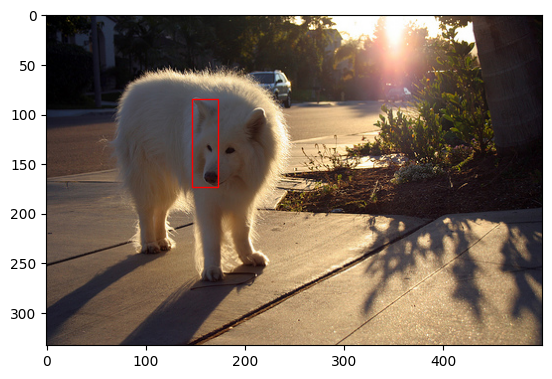

In [9]:
rnd_idx = random.randint(1, len(img_files))
file_name = img_files[rnd_idx]
file_path = os.path.join(img_dir, file_name)

image = Image.open(file_path)
image = np.array(image)
# xml 파일 파싱
bounding_box_name = os.path.splitext(file_name)[0]+'.xml'
bounding_box_path = os.path.join(bounding_box_dir, bounding_box_name)
tree = et.parse(bounding_box_path)
# 사각형 길이 정의
width = float(tree.find('./size/width').text)
height = float(tree.find('./size/height').text)
xmin = float(tree.find('./object/bndbox/xmin').text)
xmax = float(tree.find('./object/bndbox/xmax').text)
ymin = float(tree.find('./object/bndbox/ymin').text)
ymax = float(tree.find('./object/bndbox/ymax').text)

rect_x = xmin
rect_y = ymin
rect_w = ymax - xmin
rect_h = ymax - ymin

rect = Rectangle((rect_x, rect_y), rect_w, rect_h, fill=False, color = 'red')

plt.axes().add_patch(rect)
plt.imshow(image)
plt.show()


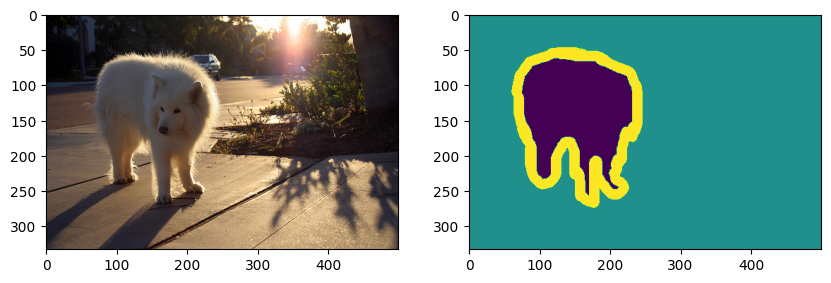

In [11]:
seg_name = os.path.splitext(file_name)[0]+'.png'
seg_path = os.path.join(seg_dir, seg_name)

seg = Image.open(seg_path)
seg = np.array(seg)

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.imshow(seg)

plt.show()